In [188]:
from nilearn.image import resample_to_img, smooth_img
from nilearn.plotting import plot_stat_map
import numpy as np
import nibabel as nb
import pylab as plt
from scipy.ndimage.filters import maximum_filter
from skimage.feature import peak_local_max
%matplotlib inline

In [185]:
import pyneurovault

In [187]:
from pyneurovault import api

# Get a collection
collection = api.get_collections(pks=1804)

SyntaxError: invalid syntax (api.py, line 45)

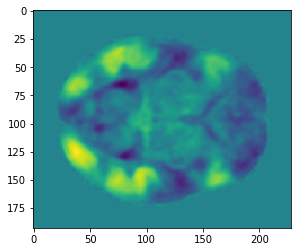

In [65]:
plt.imshow(new_nii.get_data()[:,:,80])

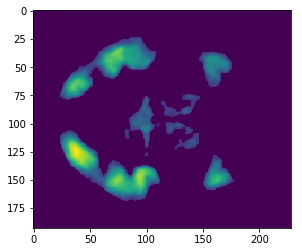

In [57]:
slice = new_nii.get_data()[:,:,80]
slice[slice < 3] = 0
plt.imshow(slice)



In [107]:
from glob import glob
import os
maps = glob("D:/data/hcp_statmaps/*.nii.gz")
vetted = [v.split("_")[-1][:-4] for v in glob("D:/drive/workspace/atlas_analysis/vetted_thumbnails/*")]
maps = [map for map in maps if os.path.split(map)[-1][:-7] in vetted]
maps

['D:/data/neurovault_backup\\101\\529.nii.gz',
 'D:/data/neurovault_backup\\101\\530.nii.gz',
 'D:/data/neurovault_backup\\101\\532.nii.gz',
 'D:/data/neurovault_backup\\101\\533.nii.gz',
 'D:/data/neurovault_backup\\101\\534.nii.gz',
 'D:/data/neurovault_backup\\101\\535.nii.gz',
 'D:/data/neurovault_backup\\101\\536.nii.gz',
 'D:/data/neurovault_backup\\101\\538.nii.gz',
 'D:/data/neurovault_backup\\101\\540.nii.gz',
 'D:/data/neurovault_backup\\101\\541.nii.gz',
 'D:/data/neurovault_backup\\101\\542.nii.gz',
 'D:/data/neurovault_backup\\101\\543.nii.gz',
 'D:/data/neurovault_backup\\101\\544.nii.gz',
 'D:/data/neurovault_backup\\101\\545.nii.gz',
 'D:/data/neurovault_backup\\101\\546.nii.gz',
 'D:/data/neurovault_backup\\101\\8745.nii.gz',
 'D:/data/neurovault_backup\\101\\8746.nii.gz',
 'D:/data/neurovault_backup\\101\\8747.nii.gz',
 'D:/data/neurovault_backup\\101\\8748.nii.gz',
 'D:/data/neurovault_backup\\101\\8749.nii.gz',
 'D:/data/neurovault_backup\\101\\8750.nii.gz',
 'D:/da

In [218]:
os.path.split(map)[-1][:-7]
import png
from scipy.misc import imsave, imread
from scipy.signal import resample

In [222]:
imread("D:/data/pix2pix-hcp/train/B/100307_EMOTION.png")[:,20]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  70,  70,  70,
        70,  70,  70,  70,  71,  72,  75,  83,  96, 111, 125, 134, 133,
       122, 105,  91,  86,  92, 100, 104, 100,  92,  84,  80,  81,  85,
        92, 101, 108, 109, 103,  91,  81,  77,  78,  81,  85,  90,  92,
        92,  91,  93,  99, 109, 122, 133, 138, 141, 147, 155, 163, 170,
       187, 217, 246, 255, 234, 194, 149, 111,  87,  75,  71,  70,  70,
        70,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [234]:
(((slice[:,20]+10)/20)*np.iinfo(np.uint16).max).astype(np.uint16)

array([32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767,
       32767, 32767, 33865, 33865, 33865, 33865, 33866, 33873, 33896,
       33947, 34024, 34110, 34193, 34262, 34312, 34336, 34329, 34308,
       34308, 34339, 34364, 34321, 34179, 33979, 33808, 33718, 33684,
       33655, 33607, 33551, 33515, 33537, 33623, 33722, 33771, 33766,
       33756, 33781, 33837, 33878, 33869, 33827, 33795, 33795, 33827,
       33872, 33926, 34004, 34114, 34242, 34368, 34479, 34564, 34615,
       34639, 34647, 34642, 34615, 34552, 34446, 34307, 34158, 34025,
       33932, 33885, 33869, 33865, 33865, 33865, 33865, 33865, 32767,
       32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767], dtype=uint16)

In [230]:
np.iinfo(np.uint16).max

65535

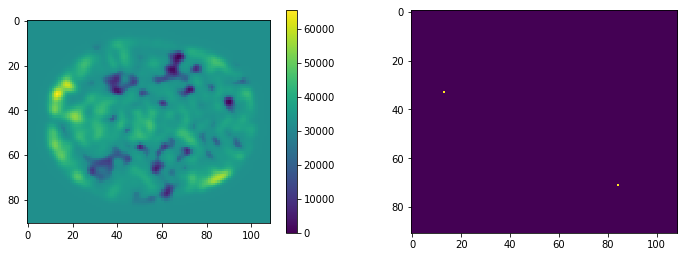

In [279]:
maps = glob("D:/data/hcp_statmaps/*.nii.gz")
for map in maps:
    if '183034_EMOTION' not in map:
        continue
    old_nii = nb.load(map)
    new_nii = smooth_img(old_nii, 6)
    slice = new_nii.get_data()[:,:,40]
    zeros = new_nii.get_data()[:,:,40] == 0
    #slice_mask = imresize(slice == 0, (512,512), interp="nearest")
    #slice = imresize(slice, (512,512), interp="nearest")
    #slice[slice_mask == 255] = 0
    #slice = np.lib.pad(slice, [(slice.shape[1]-slice.shape[0]+292,0), (292,0)], 'constant', constant_values=(0, 0))
    if peaks.sum():
        plt.figure(figsize=(12,9))
        plt.subplot(2,2,1)
        #zeros = np.logical_or(slice == slice[0,0], np.isnan(slice))
        
        #slice = (slice - slice.min())/(slice.max()-slice.min())
        #slice[zeros] = 0
        slice[slice < 0] = (slice[slice < 0]/(-slice[slice < 0].min()))*0.5
        slice[slice > 0] = (slice[slice > 0]/slice[slice > 0].max())*0.5
        slice = (((slice+0.5)/1.0)*np.iinfo(np.uint16).max).astype(np.uint16)
        peaks = peak_local_max(slice, indices=False, min_distance=5, threshold_rel=0.85)
        #print(slice[:,20])
        plt.imshow(slice)
        plt.colorbar()
        imsave("D:/data/pix2pix-hcp/train/B/" + os.path.split(map)[-1][:-7] + ".png", slice)
        plt.subplot(2,2,2)
        plt.imshow(peaks)
        imsave("D:/data/pix2pix-hcp/train/A/" + os.path.split(map)[-1][:-7] + ".png", peaks)

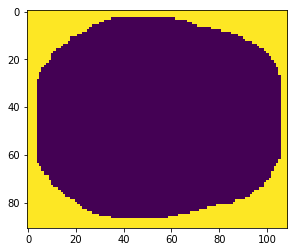

In [198]:
plt.imshow(zeros)

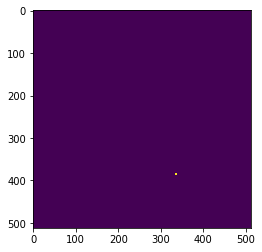

In [182]:
plt.imshow(slice_mask)

In [155]:
resample_to_img?

In [125]:
png.from_array?

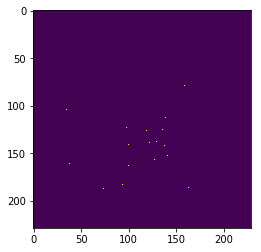

In [87]:
plt.imshow(peaks)

In [148]:
slice.shape

(229, 229)

In [149]:
512-219

293

In [153]:
slice.shape

(522, 522)

In [159]:
from scipy.misc import imresize

In [168]:
s = imresize(slice, (512,512), interp="nearest")

In [169]:
s

array([[149, 149, 149, ..., 149, 149, 149],
       [149, 149, 149, ..., 149, 149, 149],
       [149, 149, 149, ..., 149, 149, 149],
       ..., 
       [149, 149, 149, ..., 149, 149, 149],
       [149, 149, 149, ..., 149, 149, 149],
       [149, 149, 149, ..., 149, 149, 149]], dtype=uint8)